<a href="https://colab.research.google.com/github/IsadoraPrevitalle/Ciclo_de_vida_do_dado/blob/main/healthcare_spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('healthcare_spending (1).csv')

df

,beneficiary_id,name,age,gender,procedure,cost,provider,plan_type,date
0,8076c509-46c0-4c00-97b2-b4f2f5309691,Crystal Romero,87,M,Fisioterapia,5081.93,Provider A,Premium,2023-05-01
1,be6cdd90-952e-4ffc-9d6f-788643f3e553,Kerry Marquez,40,F,Exame de sangue,7509.45,Provider D,Premium,2024-05-16
2,b793deeb-4693-4dcc-864f-b1a13c75da6b,Jeremiah Macdonald,66,M,Consulta médica,5098.85,Provider D,Avançado,2023-10-19
3,9a2c118f-8d95-4039-93e5-3399f7a0a023,John Jackson,71,F,Consulta médica,3812.80,Provider B,Básico,2021-11-28
4,38b7c159-7fc1-433d-9e83-dabca808ed9d,Tracy Boyd MD,61,M,Vacinação,8202.60,Provider C,Básico,2020-04-04
...,...,...,...,...,...,...,...,...,...
999995,491cef51-050e-44f8-b35f-35561fda01b3,Dr. Makayla Johnson,76,M,Fisioterapia,719.00,Provider D,Avançado,2022-01-03
999996,a8d28d93-25ac-4bee-9cce-28641b8740ab,Teresa Horton,99,F,Vacinação,8303.84,Provider A,Premium,2020-10-26
999997,62254cdb-bead-41d8-97e1-9bbcd014b70f,Linda Reeves,39,F,Consulta odontológica,6877.77,Provider D,Avançado,2020-05-12
999998,5171a72f-7b33-4c03-8d1c-fc85e9ce47f3,Ralph Peterson,58,F,Vacinação,8196.24,Provider C,Intermediário,2020-12-01


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   beneficiary_id  1000000 non-null  object 
 1   name            1000000 non-null  object 
 2   age             1000000 non-null  int64  
 3   gender          1000000 non-null  object 
 4   procedure       1000000 non-null  object 
 5   cost            1000000 non-null  float64
 6   provider        1000000 non-null  object 
 7   plan_type       1000000 non-null  object 
 8   date            1000000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 68.7+ MB
None


In [ ]:
# Limpeza de dados - removendo valores nulos
df_cleaned = df.dropna()
df_cleaned

,beneficiary_id,name,age,gender,procedure,cost,provider,plan_type,date
0,8076c509-46c0-4c00-97b2-b4f2f5309691,Crystal Romero,87,M,Fisioterapia,5081.93,Provider A,Premium,2023-05-01
1,be6cdd90-952e-4ffc-9d6f-788643f3e553,Kerry Marquez,40,F,Exame de sangue,7509.45,Provider D,Premium,2024-05-16
2,b793deeb-4693-4dcc-864f-b1a13c75da6b,Jeremiah Macdonald,66,M,Consulta médica,5098.85,Provider D,Avançado,2023-10-19
3,9a2c118f-8d95-4039-93e5-3399f7a0a023,John Jackson,71,F,Consulta médica,3812.80,Provider B,Básico,2021-11-28
4,38b7c159-7fc1-433d-9e83-dabca808ed9d,Tracy Boyd MD,61,M,Vacinação,8202.60,Provider C,Básico,2020-04-04
...,...,...,...,...,...,...,...,...,...
999995,491cef51-050e-44f8-b35f-35561fda01b3,Dr. Makayla Johnson,76,M,Fisioterapia,719.00,Provider D,Avançado,2022-01-03
999996,a8d28d93-25ac-4bee-9cce-28641b8740ab,Teresa Horton,99,F,Vacinação,8303.84,Provider A,Premium,2020-10-26
999997,62254cdb-bead-41d8-97e1-9bbcd014b70f,Linda Reeves,39,F,Consulta odontológica,6877.77,Provider D,Avançado,2020-05-12
999998,5171a72f-7b33-4c03-8d1c-fc85e9ce47f3,Ralph Peterson,58,F,Vacinação,8196.24,Provider C,Intermediário,2020-12-01


In [ ]:
print(df_cleaned.describe())

                  age            cost
count  1000000.000000  1000000.000000
mean        49.991023     5025.205352
std         29.147039     2874.481162
min          0.000000       50.010000
25%         25.000000     2533.357500
50%         50.000000     5025.270000
75%         75.000000     7517.250000
max        100.000000     9999.980000


In [ ]:
# Agregação - Custo médio de plano
age_cost_mean = df.groupby('age')['cost'].mean().reset_index()

print(age_cost_mean)

     age         cost
0      0  4985.279368
1      1  5007.126129
2      2  5028.301106
3      3  5019.241570
4      4  5025.471521
..   ...          ...
96    96  4998.514837
97    97  5050.877101
98    98  5026.039237
99    99  5036.409922
100  100  5064.537788

[101 rows x 2 columns]


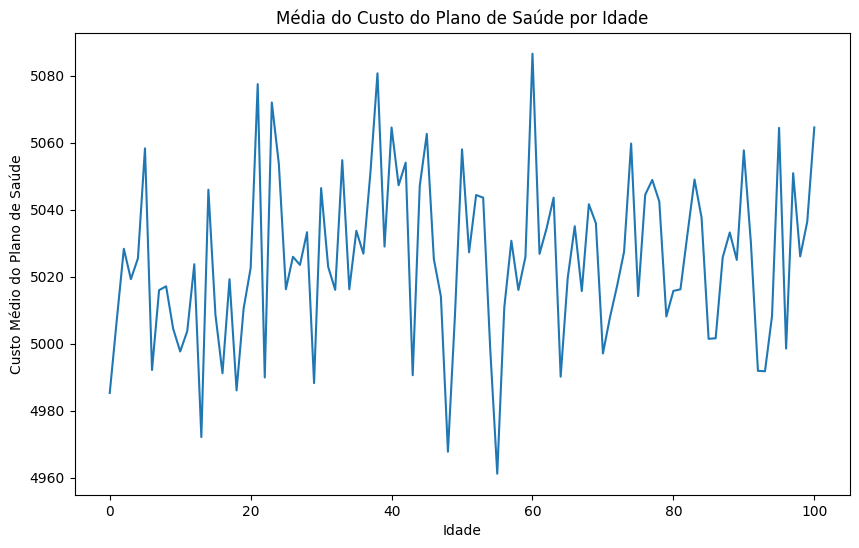

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='cost', data=age_cost_mean)
plt.title('Média do Custo do Plano de Saúde por Idade')
plt.xlabel('Idade')
plt.ylabel('Custo Médio do Plano de Saúde')
plt.show()

Erro Quadrático Médio (MSE): 721.7234351022516
Coeficiente de Determinação (R²): 0.03821752309711246


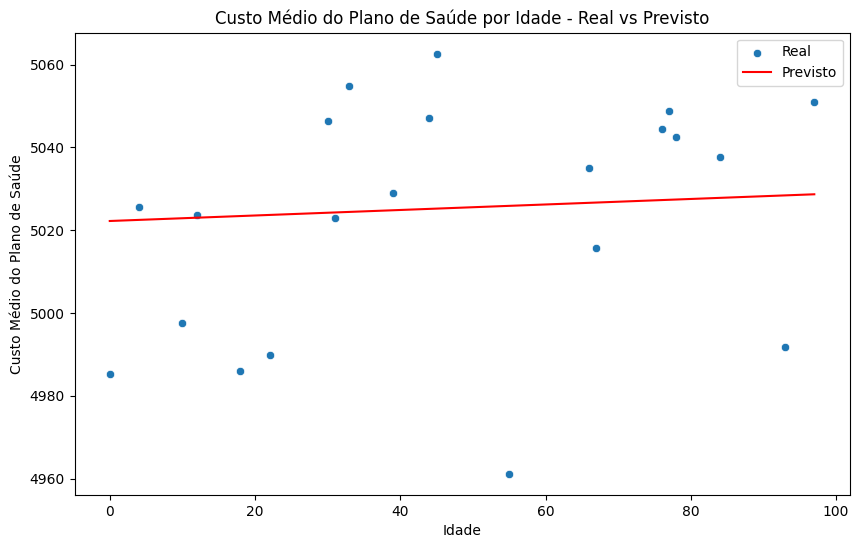

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

age_cost_mean = df.groupby('age')['cost'].mean().reset_index()

X = age_cost_mean[['age']]
y = age_cost_mean['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, label="Real")
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label="Previsto")
plt.title('Custo Médio do Plano de Saúde por Idade - Real vs Previsto')
plt.xlabel('Idade')
plt.ylabel('Custo Médio do Plano de Saúde')
plt.legend()
plt.show()


In [ ]:
# Apagando os dados do DataFrame da memória
del df